In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder

# Physical Parameters
 
## Qubit Physical Parameters

In [3]:
def set_physical_parameter(value, units):
    if value == 0:
        return 0
    else:
        return str(value)+units

In [4]:
cross_gap = 30
cross_width = 30
cross_length = 240
L_j = 10
C_j = 0

## Claw Physical Parameters

In [5]:
claw_length = 150
claw_width = 7
claw_gap = 6

In [6]:
claw_params = dict(connector_location = '180',
                 claw_length =  set_physical_parameter(claw_length, "um"),
                 claw_width = set_physical_parameter(claw_width, "um"),
                 claw_gap =  set_physical_parameter(claw_gap, "um"),
                 ground_spacing = '10um')

## Chip Parameters

In [7]:
chip_x = 2
chip_y = 2

In [8]:
design = designs.DesignPlanar({}, True)
design.delete_all_components()

design.chips.main.size['size_x'] = set_physical_parameter(chip_x, "mm")
design.chips.main.size['size_y'] = set_physical_parameter(chip_y, "mm")

In [9]:
gui = MetalGUI(design)

# Qubit on GUI 

In [10]:
TransmonCrossFL.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 '_default_connection_pads': {'connector_type': '0',
  'claw_length': '30um',
  'ground_spacing': '5um',
  'claw_width': '10um',
  'claw_gap': '6um',
  'connector_location': '0'},
 'cross_width': '20um',
 'cross_length': '200um',
 'cross_gap': '20um',
 'make_fl': True,
 'fl_options': {'t_top': '15um',
  't_offset': '0um',
  't_inductive_gap': '3um',
  't_width': '5um',
  't_gap': '3um'},
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

In [11]:
transmon_options = dict(
        chip = 'main',
        pos_x = '-1mm',
        cross_gap = set_physical_parameter(cross_gap, "um"), 
        cross_width = set_physical_parameter(cross_width, "um"), 
        cross_length = set_physical_parameter(cross_length, "um"), 
        hfss_inductance = set_physical_parameter(L_j, "nH"),
        hfss_capacitance = set_physical_parameter(C_j, "fF"),
        q3d_inductance = set_physical_parameter(L_j, "nH"),
        q3d_capacitance = set_physical_parameter(C_j, "fF"),
        connection_pads=dict(
        claw = claw_params,
        )
)


In [12]:
q1 = TransmonCrossFL(design, 'Q1', options = transmon_options)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)



  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)



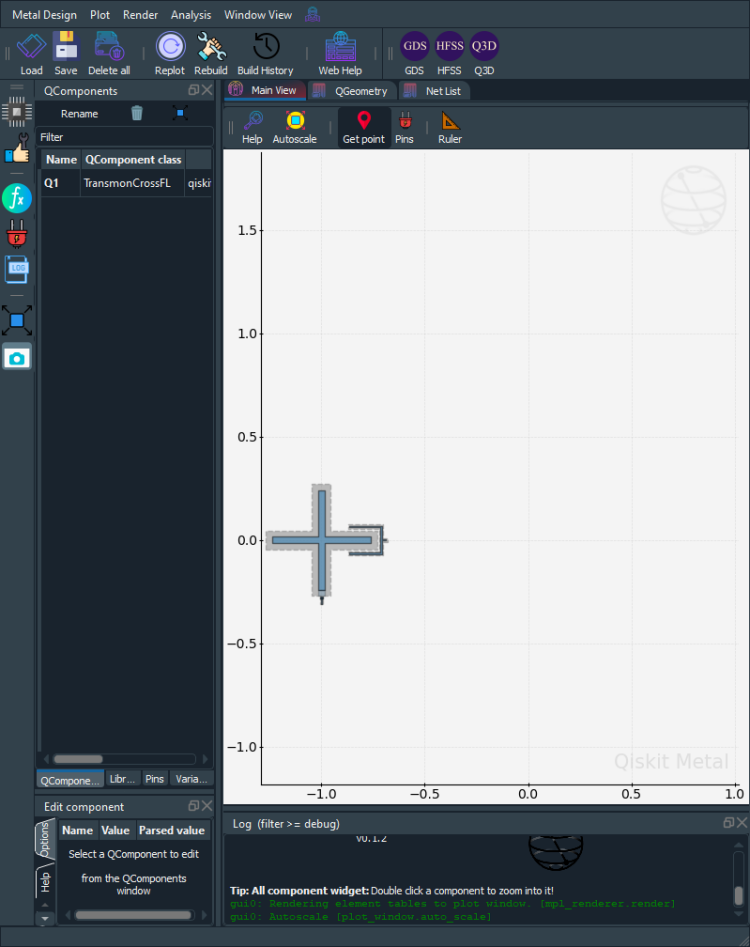

In [13]:
gui.rebuild()
gui.autoscale()
gui.screenshot()

# EPR Analysis of Qubit with Claw

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis

In [ ]:
eig_1qb = EPRanalysis(design, "hfss")

In [ ]:
hfss1 = eig_1qb.sim.renderer

## Simulation Set Up

In [ ]:
eig_1qb.sim.setup

In [ ]:
eig_1qb.sim.setup.max_passes = 60 # mesh setting
eig_1qb.sim.setup.max_delta_f = 0.05
eig_1qb.sim.setup.n_modes = 1 # number of division of the chip (qubit + claw)
eig_1qb.sim.renderer.options['x_buffer_width_mm'] = 0.5
eig_1qb.sim.renderer.options['y_buffer_width_mm'] = 0.5
eig_1qb.sim.setup.reuse_selected_design = False
eig_1qb.sim.setup.reuse_setup = False
eig_1qb.sim.setup.min_freq_ghz = 2 #GHz

eig_1qb.sim.renderer.options

In [14]:
resistance = 50 #Ohms #signal path R

In [ ]:
eig_1qb.sim.run(name="OCS_qubit",
                components=[ 'Q1'],  open_terminations=[],  port_list=[("Q1","claw", resistance)], box_plus_buffer = True)

## Simulation Outputs

In [37]:
%matplotlib inline
import numpy as np

In [ ]:
eig_1qb.sim.plot_convergences()

In [ ]:
eig_1qb.sim.convergence_f

### Qubit Frequency

In [ ]:
freqs = eig_1qb.sim.convergence_f["re(Mode(1)) [g]"].values
freqs = freqs[~np.isnan(freqs)]

In [ ]:
qubit_freq = freqs[-1]
qubit_freq

`hfss1.start() # restart HFSS`

# EPR Again

In [16]:
from qiskit_metal.analyses.quantization import EPRanalysis

eig_qb = EPRanalysis(design, "hfss")

In [48]:
hfss = eig_qb.sim.renderer
x = hfss.start()


INFO 10:49PM [connect_project]: Connecting to Ansys Desktop API...
INFO 10:49PM [load_ansys_project]: 	Opened Ansys App
INFO 10:49PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 10:49PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   Project15
INFO 10:49PM [connect_design]: 	Opened active design
	Design:    TransmonQubit_2 [Solution type: Eigenmode]
INFO 10:49PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 10:49PM [connect]: 	Connected to project "Project15" and design "TransmonQubit_2" 😀 



In [49]:
x 

True

In [20]:
hfss.activate_ansys_design("TransmonQubit_2", 'eigenmode')  # use new_ansys_design() to force creation of a blank design

10:11PM 30s WARNING [activate_ansys_design]: The design_name=TransmonQubit_2 was not in active project.  Designs in active project are: 
['TransmonQubit'].  A new design will be added to the project.  
INFO 10:11PM [connect_design]: 	Opened active design
	Design:    TransmonQubit_2 [Solution type: Eigenmode]
WARNING 10:11PM [connect_setup]: 	No design setup detected.
WARNING 10:11PM [connect_setup]: 	Creating eigenmode default setup.
INFO 10:11PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [21]:
hfss.render_design(
                selection=['Q1'],  open_pins=[],  port_list=[("Q1","claw", resistance)], box_plus_buffer = True)

In [23]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 17
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', set_physical_parameter(L_j, "nH")
pinfo.design.set_variable('Cj', set_physical_parameter(C_j, "fF")

setup.analyze()

INFO 10:12PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 17
Convergence freq max delta percent diff  = 0.1



10:16PM 06s INFO [get_f_convergence]: Saved convergences to C:\Users\lfl\OCS_Transmon_Qubit\hfss_eig_f_convergence.csv


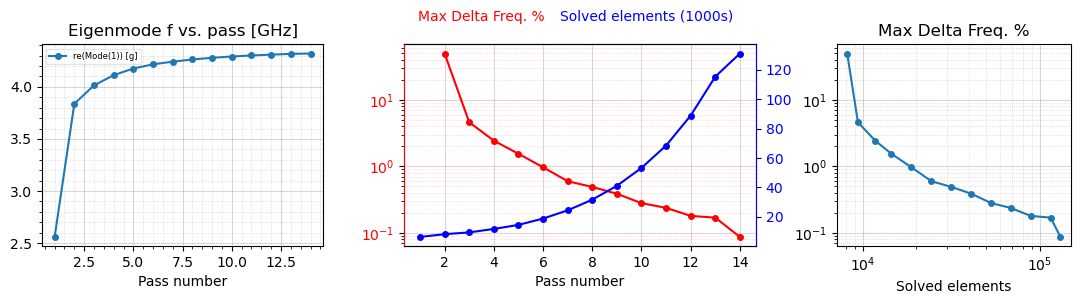

In [24]:
eig_qb.sim.convergence_t, eig_qb.sim.convergence_f, _ = hfss.get_convergences()
eig_qb.sim.plot_convergences()

In [38]:
freqs = eig_qb.sim.convergence_f["re(Mode(1)) [g]"].values

freqs = freqs[~np.isnan(freqs)]

qubit_freq = freqs[-1]
qubit_freq

4.32065244615986

In [25]:
pinfo = hfss.pinfo
pinfo.junctions['jj'] = {'Lj_variable': 'Lj', 'rect': 'JJ_rect_Lj_Q1_rect_jj',
                             'line': 'JJ_Lj_Q1_rect_jj_',  'Cj_variable': 'Cj'}
pinfo.validate_junction_info() # Check that valid names of variables and objects have been supplied
pinfo.dissipative['dielectrics_bulk'] = ['main'] # Dissipative elements: specify

In [26]:
import pyEPR as epr

eprd = epr.DistributedAnalysis(pinfo)

Design "TransmonQubit_2" info:
	# eigenmodes    1
	# variations    1


In [27]:
ℰ_elec = eprd.calc_energy_electric()
ℰ_elec_substrate = eprd.calc_energy_electric(None, 'main')
ℰ_mag = eprd.calc_energy_magnetic()

print(f"""
ℰ_elec_all       = {ℰ_elec}
ℰ_elec_substrate = {ℰ_elec_substrate}
EPR of substrate = {ℰ_elec_substrate / ℰ_elec * 100 :.1f}%

ℰ_mag    = {ℰ_mag}
""")



ℰ_elec_all       = 1.53796979761653e-25
ℰ_elec_substrate = 1.41704146599569e-25
EPR of substrate = 92.1%

ℰ_mag    = 1.97031443421013e-27



In [50]:
ℰ_mag/ℰ_elec_substrate

0.013904423275473315

In [29]:
eprd.do_EPR_analysis()


  options=pd.Series(get_instance_vars(self.options)),




Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 4.32 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.7%   7.69e-26 9.852e-28

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.55%
	jj              0.986837  (+)        0.0145457
		(U_tot_cap-U_tot_ind)/mean=0.74%
Calculating Qdielectric_main for mode 0 (0/0)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_0 = 0.9213714522819312


  options=pd.Series(get_instance_vars(self.options)),




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project15\TransmonQubit_2\2022-11-14 22-16-07.npz




(WindowsPath('C:/data-pyEPR/Project15/TransmonQubit_2/2022-11-14 22-16-07.npz'),
 ['0'])

In [30]:

# 4a. Perform Hamiltonian spectrum post-analysis, building on mw solutions using EPR
epra = epr.QuantumAnalysis(eprd.data_filename)



WARNING 10:16PM [__init__]: <p>Error: <class 'IndexError'></p>


	 Differences in variations:




In [31]:
sim_info = epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 7)

  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.015
dtype: float64

Pm_norm idx =
     jj
0  True
*** P (participation matrix, not normlz.)
         jj
0  0.972688

*** S (sign-bit matrix)
   s_jj
0    -1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       139

*** Chi matrix ND (MHz) 
       150

*** Frequencies O1 PT (MHz)
0    4181.50569
dtype: float64

*** Frequencies ND (MHz)
0    4176.720288
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


In [32]:
import pandas as pd

df = pd.DataFrame(sim_info, columns=sim_info.keys())
df

,0
Cjs,"jj 2.000000e-15 Name: 0, dtype: float64"
Ljs,"jj 1.000000e-08 Name: 0, dtype: float64"
Pm_normed,[[0.9872791389042141]]
Pm_raw,"0 0.972688 Name: jj, dtype: float64"
Q_coupling,Empty DataFrame Columns: [] Index: [0]
Qs,"0 1.033097e+07 Name: 0, dtype: float64"
ZPF,[[-0.3612200862386574]]
_Pm_cap_norm,modes 0 0.491507 dtype: float64
_Pm_norm,modes 0 1.015 dtype: float64
chi_ND,0 0 149.518862


In [33]:
EjEc_ratio = float(epra.get_Ejs('0')) / float(epra.get_Ecs('0'))
EjEc_ratio

1.6877602228352326

In [109]:
Ec_GHz = float(epra.get_Ecs('0')) # GHz
Ec_GHz

9.68511466232956

In [106]:
from pyEPR.calcs.convert import π, pi, ϕ0, fluxQ, Planck, ħ, hbar, elementary_charge, e_el


In [91]:
cj = df["0"]["Cjs"].values[0]
lj = df["0"]["Ljs"].values[0]

In [92]:
import pyEPR.calcs
from pyEPR.calcs import Convert

In [123]:
Lj_nH, Cs_fF = Convert.fromSI(lj, "nH"), Convert.Cs_from_Ec(Ec_GHz, 'GHz', "fF")

In [127]:
Ec_GHz

9.68511466232956

In [129]:
Convert.Cs_from_Ec(Ec_GHz, 'GHz', "fF")

2.0

In [130]:
pyEPR.calcs.CalcsTransmon.transmon_print_all_params(Lj_nH, Cs_fF)

<IPython.core.display.Math object>

'\n        \\begin{align}\n            L_J               &=10.0 \\mathrm{\\ nH}       &  C_\\Sigma &=2.0 \\mathrm{\\ fF}   \\\\\n            E_J               &=16.35 \\mathrm{\\ GHz}      &  E_C      &=9685 \\mathrm{\\ MHz}  \\\\\n            \\omega_0  &=2\\pi\\times 35.59 \\mathrm{\\ GHz}   &  Z_0 &= 2236 \\mathrm{\\ \\Omega}   \\\\\n            \\phi_\\mathrm{ZPF} &= 1.04 \\ \\ \\phi_0         &  n_\\mathrm{ZPF} &=0.48 \\ \\ (2e)  \\\\\n        \\end{align}\n        '

In [131]:
transmon_info =  pyEPR.calcs.CalcsTransmon.transmon_get_all_params(Lj_nH, Cs_fF)

In [133]:
16.35 * 10**3 / 9685

1.688177594217863

In [132]:
transmon_info

{'Ej_MHz': 10.000000000000004,
 'Ec_MHz': 2.0,
 'Lj_H': 1.6346151280678115e-05,
 'Cs_F': 9.685114662329562e-12,
 'Lj_nH': 16346.151280678116,
 'Cs_fF': 9685.11466232956,
 'Phi_ZPF': 2.617283513437671e-16,
 'Q_ZPF': 2.014630459848481e-19,
 'phi_ZPF': 0.7952707287670506,
 'n_ZPF': 0.6287167148414676,
 'Omega_MHz': 79.4767061263688,
 'f_MHz': 0.012649110640673516,
 'Z_Ohms': 1299.1382616316218}

In [115]:
E_ratio = transmon_info["Ej_MHz"] / transmon_info["Ec_MHz"]
E_ratio

5.000000000000002

In [47]:
alpha = df["0"]["chi_O1"].values[0][0] #?
alpha 

139.14675609381982

In [40]:
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'
eig_qb.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

Design "TransmonQubit_2" info:
	# eigenmodes    1
	# variations    1
Design "TransmonQubit_2" info:
	# eigenmodes    1
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 1.53796979761653e-25
        energy_elec_substrate = 1.41704146599569e-25
        EPR of substrate = 92.1%

        energy_mag    = 1.97031443421013e-27
        energy_mag % of energy_elec_all  = 1.3%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 4.32 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.7%   7.69e-26 9.852e-28

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.55%
	jj              0.986837  (+)        0.0145457
		(U_tot_cap-U_tot_ind)/mean=0.74%
Calculating Qdielectric_main for mode 0 (0/0)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_0 = 0.9213714522819312


  options=pd.Series(get_instance_vars(self.options)),

WARNING 10:30PM [__init__]: <p>Error: <class 'IndexError'></p>
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project15\TransmonQubit_2\2022-11-14 22-30-42.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.015
dtype: float64

Pm_norm idx =
     jj
0  True
*** P (participation matrix, not normlz.)
         jj
0  0.972688

*** S (sign-bit matrix)
   s_jj
0    -1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       139

*** Chi matrix ND (MHz) 
       150

*** Frequencies O1 PT (MHz)
0    4181.50569
dtype: float64

*** Frequencies ND (MHz)
0    4176.720288
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,10
0,4176.72


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj,,
10,0,149.52


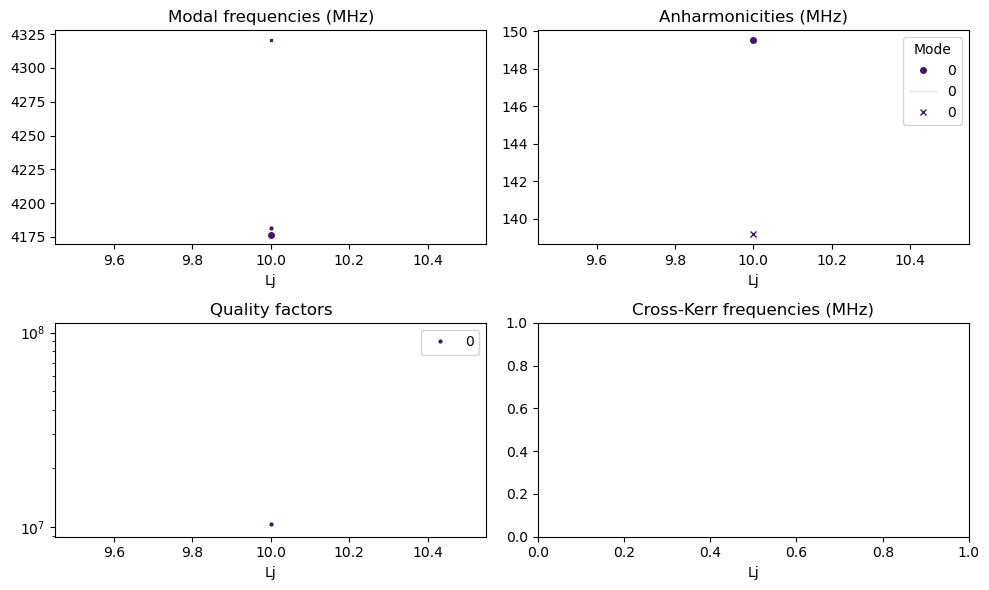

In [41]:
eig_qb.run_epr()